# Exploration of 2019 Sales Data Zero Values.

In [85]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.formula.api import ols
from scipy import stats
import seaborn as sns
import statsmodels.api as sm
pd.set_option('display.max_columns', None)
pd.set_option("display.max_colwidth", 0)
#add auto reload for src function testing
%load_ext autoreload
%autoreload 2
%matplotlib inline

#let's add the project directory to our module path
import os
import sys

module_path = os.path.abspath(os.path.join(os.pardir, os.pardir))
if module_path not in sys.path:
    sys.path.append(module_path)
    
    
#also import all of our modules
import pandas as pd
import numpy as np
from src import data_cleaning
from src import cm_functions

#and here is our data directiory
data_folder = '../../data/'

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Initial import of 2019 Sales Data containing Zero Values. We will also import our Description look up data frame to make sense of the values. Lastly, we have a function that will bring up our look up items and sort them chronologically.

In [90]:
sales_2019=pd.read_csv('../../data/EXTR_RPSale_2019.csv',dtype={'ExciseTaxNbr': 'string','Major': 'string','Minor': 'string','PIN':'string'})
df_lu=pd.read_csv('../../data/EXTR_LookUp.csv')
def LU_item(df,number):
    """Put in name of your Look up data frame then description number and it will use this Data frame. 
    To give the values associated with it and its descriptions from least to greatest"""
    lu_list=df[df["LUType"]== number]
    return lu_list.sort_values("LUItem", ascending=True)

## Now we will access all of our zero values.

In [91]:
zero_sales=sales_2019[sales_2019["SalePrice"]==0]

## Les take a look at our Sale Instrument column and see how these sales were done.

In [92]:
zero_sales["SaleInstrument"].value_counts()

15    10410
3     1882 
26    343  
24    267  
2     232  
27    100  
4     93   
22    42   
18    35   
21    9    
19    8    
20    2    
23    1    
1     1    
Name: SaleInstrument, dtype: int64

## To make sense of these values we will need to utlize our Look up date frame.

In [94]:
SaleInstrument=LU_item(df_lu,6)
SaleInstrument

,LUType,LUItem,LUDescription
1002,6,1,None
1009,6,2,Warranty Deed
1019,6,3,Statutory Warranty Deed
1020,6,4,Special Warranty Deed
1021,6,5,Corporate Warranty Deed
1022,6,6,Assumption Warranty Deed
1023,6,7,Grant Deed
1024,6,8,Contract (equity)
1025,6,9,Contract (installment)
1003,6,10,Real Estate Contract


[Click this link to gain more insight into Deed types](https://thismatter.com/money/real-estate/deed-types.htm)

## Now that we see that our values mean we can sort the number 

In [87]:
zero_list=list(zero_sales["SaleInstrument"].value_counts())
zero_list

[10410, 1882, 343, 267, 232, 100, 93, 42, 35, 9, 8, 2, 1, 1]

## We now gather the sum of all the values aded together to help us calculate the prcentage per sale instrument.

In [66]:
sum_values=[10410+1882+ 343+ 267+ 232+ 100+ 93+ 42+ 35+ 9+ 8+ 2+ 1+ 1]
sum_values

[13425]

## Now we run this through a loop to allow for our percentage values to be added to our percentage list.

In [95]:
zero__values_percentage=[]
values=[10410, 1882, 343, 267, 232, 100, 93, 42, 35, 9, 8, 2, 1, 1]
for x in values:
    quo=(x/13425)*100
    zero__values_percentage.append(quo)


In [97]:
zero__values_percentage

[77.54189944134077,
 14.018621973929237,
 2.5549348230912474,
 1.9888268156424582,
 1.728119180633147,
 0.74487895716946,
 0.6927374301675978,
 0.3128491620111732,
 0.260707635009311,
 0.0670391061452514,
 0.059590316573556804,
 0.014897579143389201,
 0.0074487895716946004,
 0.0074487895716946004]

## The next step is to create our x axis tick marks for each percentage value and they apporiate desccription on the Look up table.

In [18]:
name_list= ["Quit Claim Deed", "Statutory Warranty Deed","Other - See Affidavit","Deed of Personal Rep", "Warranty Deed","DEED","Special Warranty Deed",
"Bargain and Sales Deed","Trustees Deed", "Sheriff's Deed","Executor's Deed","Fiduciary Deed","Receivers Deed","N/A"]

## Lastly, we will plot the data to have nice viusal of our data.

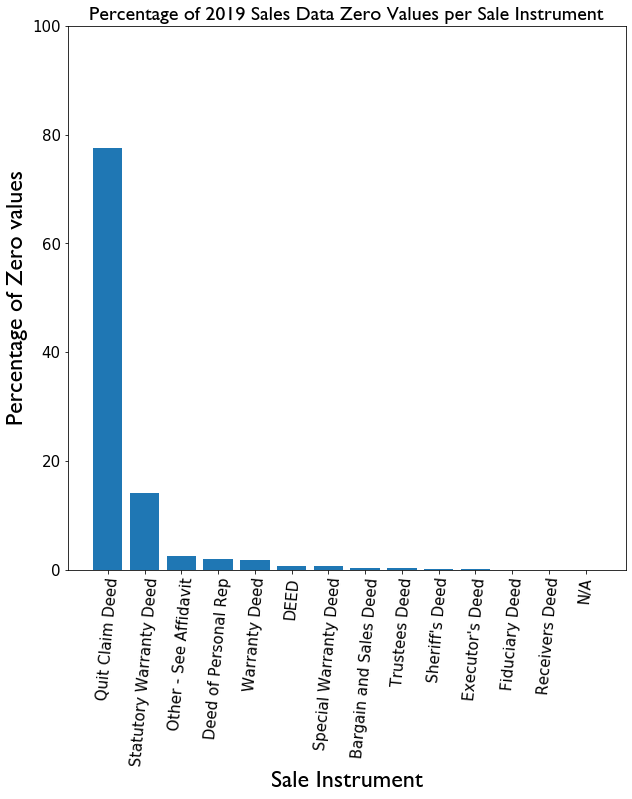

In [100]:
plt.figure(figsize=(10,10))
plt.bar(x= name_list, height=zero__values_percentage);
plt.ylabel('Percentage of Zero values', fontsize=24,fontname="Gill Sans MT")
plt.title('Percentage of 2019 Sales Data Zero Values per Sale Instrument', fontsize=20,fontname="Gill Sans MT")
plt.xlabel('Sale Instrument', fontsize=24,fontname="Gill Sans MT")
degrees = 70
plt.xticks(fontsize=15,rotation=85)
plt.yticks(fontsize=15)
plt.ylim(0, 100)

plt.savefig('Zdata.png', transparent=True,dpi=300, bbox_inches = "tight")
plt.show()

 
## This plot shows us that majoritiy of the zero values are quit claim deeds ~77%. This means that the house was passed from the grantor to the grantee. So this is an example of a sort of in heritance. This would make sense because most granteee do no pay for a inherited gift so the sales value is zero.